## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Data Collection


We got our data from  https://archive.ics.uci.edu/ml/datasets/wine+quality website

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

The dataset are related to red variants of the Portuguese "Vinho Verde" wine.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
df.shape

(1599, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [91]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [139]:
df['quality'].value_counts()

5    513
6    498
7    135
4     33
Name: quality, dtype: int64

### Data Preparation

#### Exploring the dataset further
*TODO*
<li>We check for missing values and handle if any</li>
<li>We check for outliers if any and handle them</li>
<li>Implementing Correlation heatmap</li>
<li>We check the distribution of data using histograms</li>
<li>Prepare the data for modeling</li>

In [92]:
#Checking for missing data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in this dataset

<AxesSubplot:>

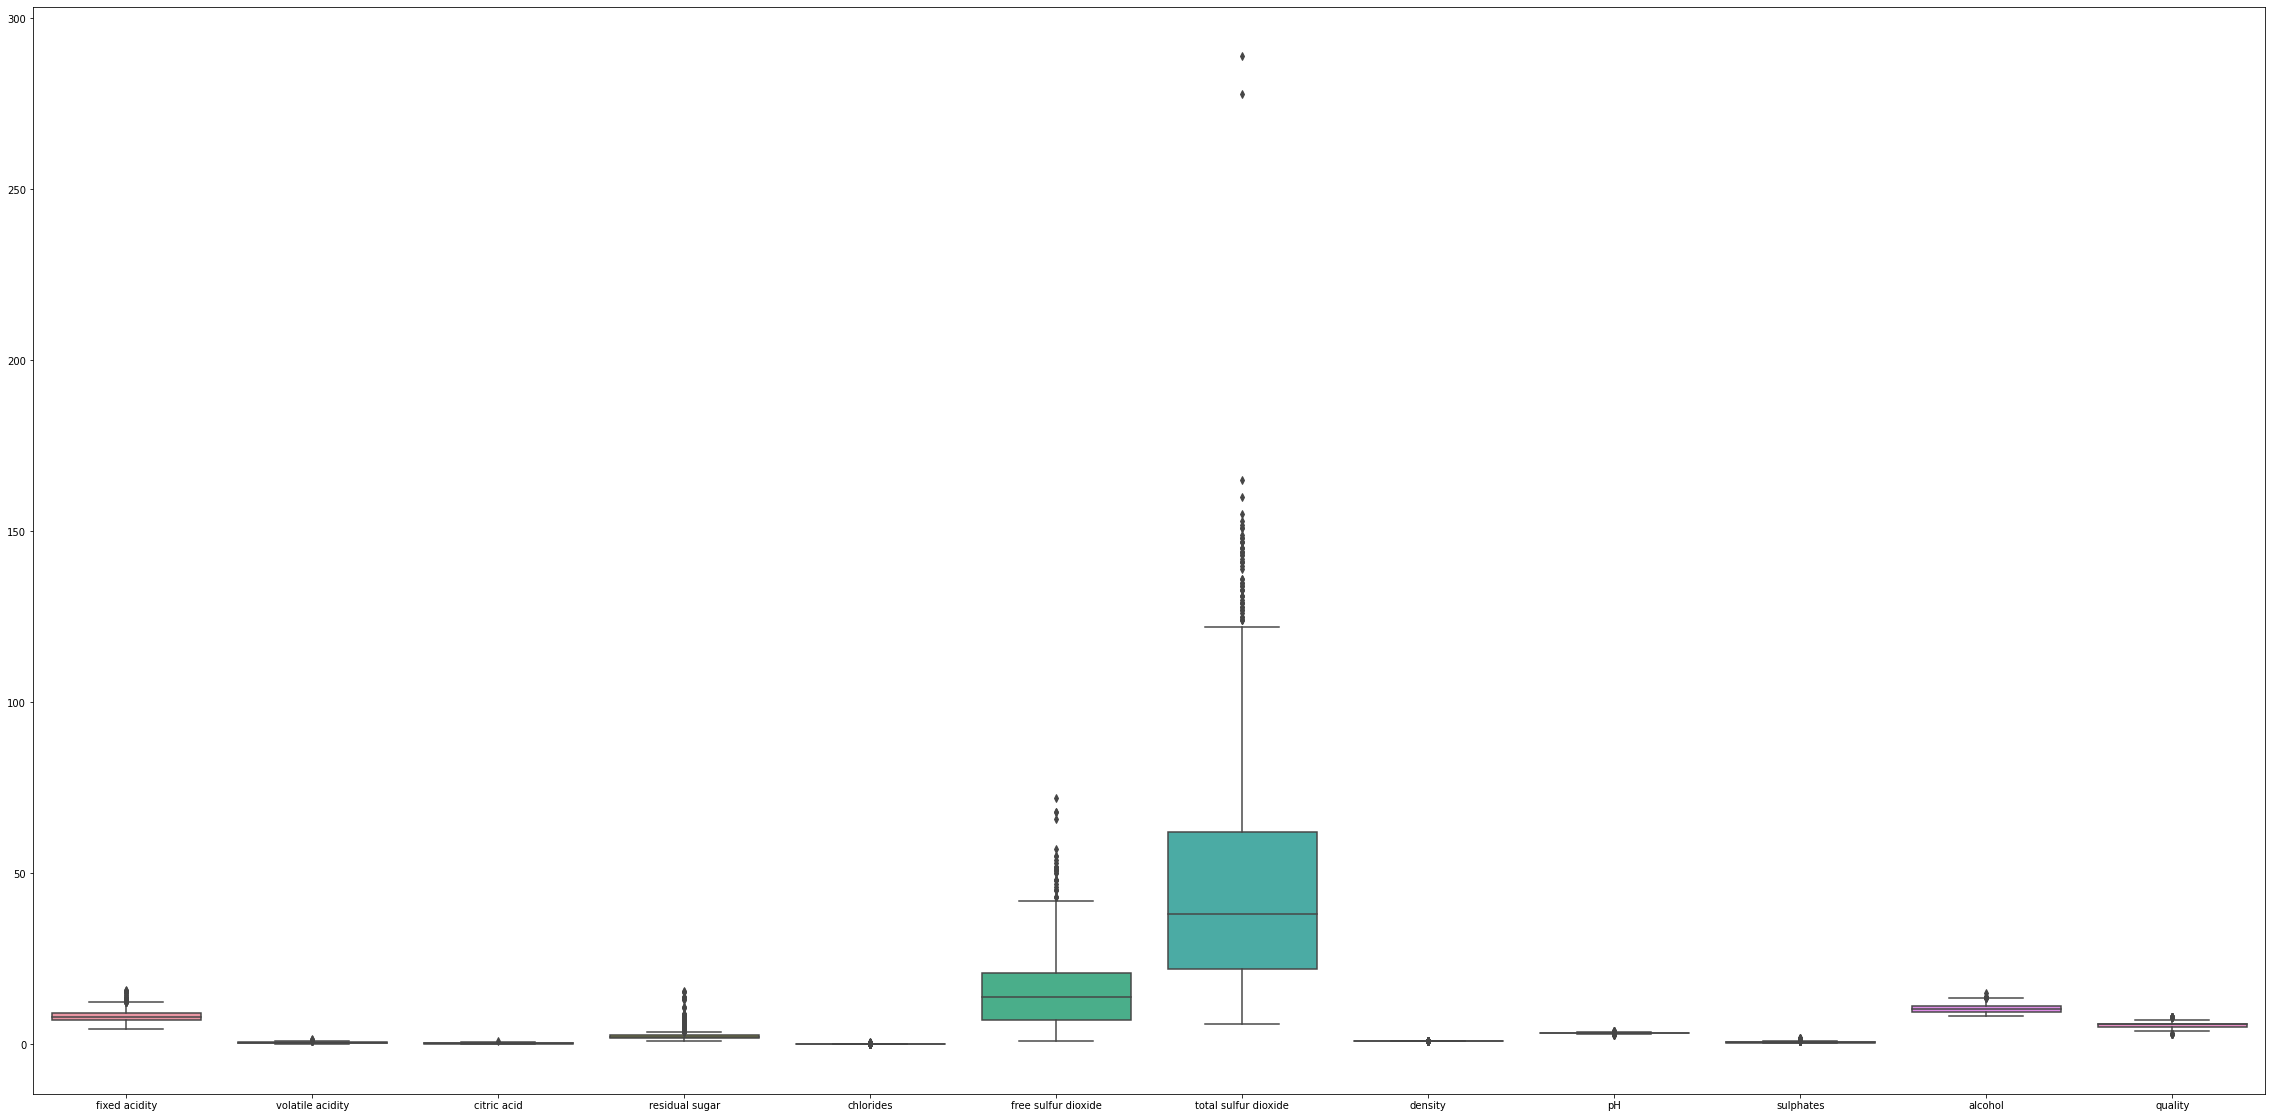

In [93]:
#Checking for outliers
plt.figure(figsize=(40,20))
sns.boxplot(data=df)

In [94]:
#Removing outliers
q1=df.quantile(0.25)
q2=df.quantile(0.75)
IQR=q2-q1

df=df[~((df<(q1-1.5*IQR))|(df>(q2+1.5*IQR))).any(axis=1)]

<AxesSubplot:>

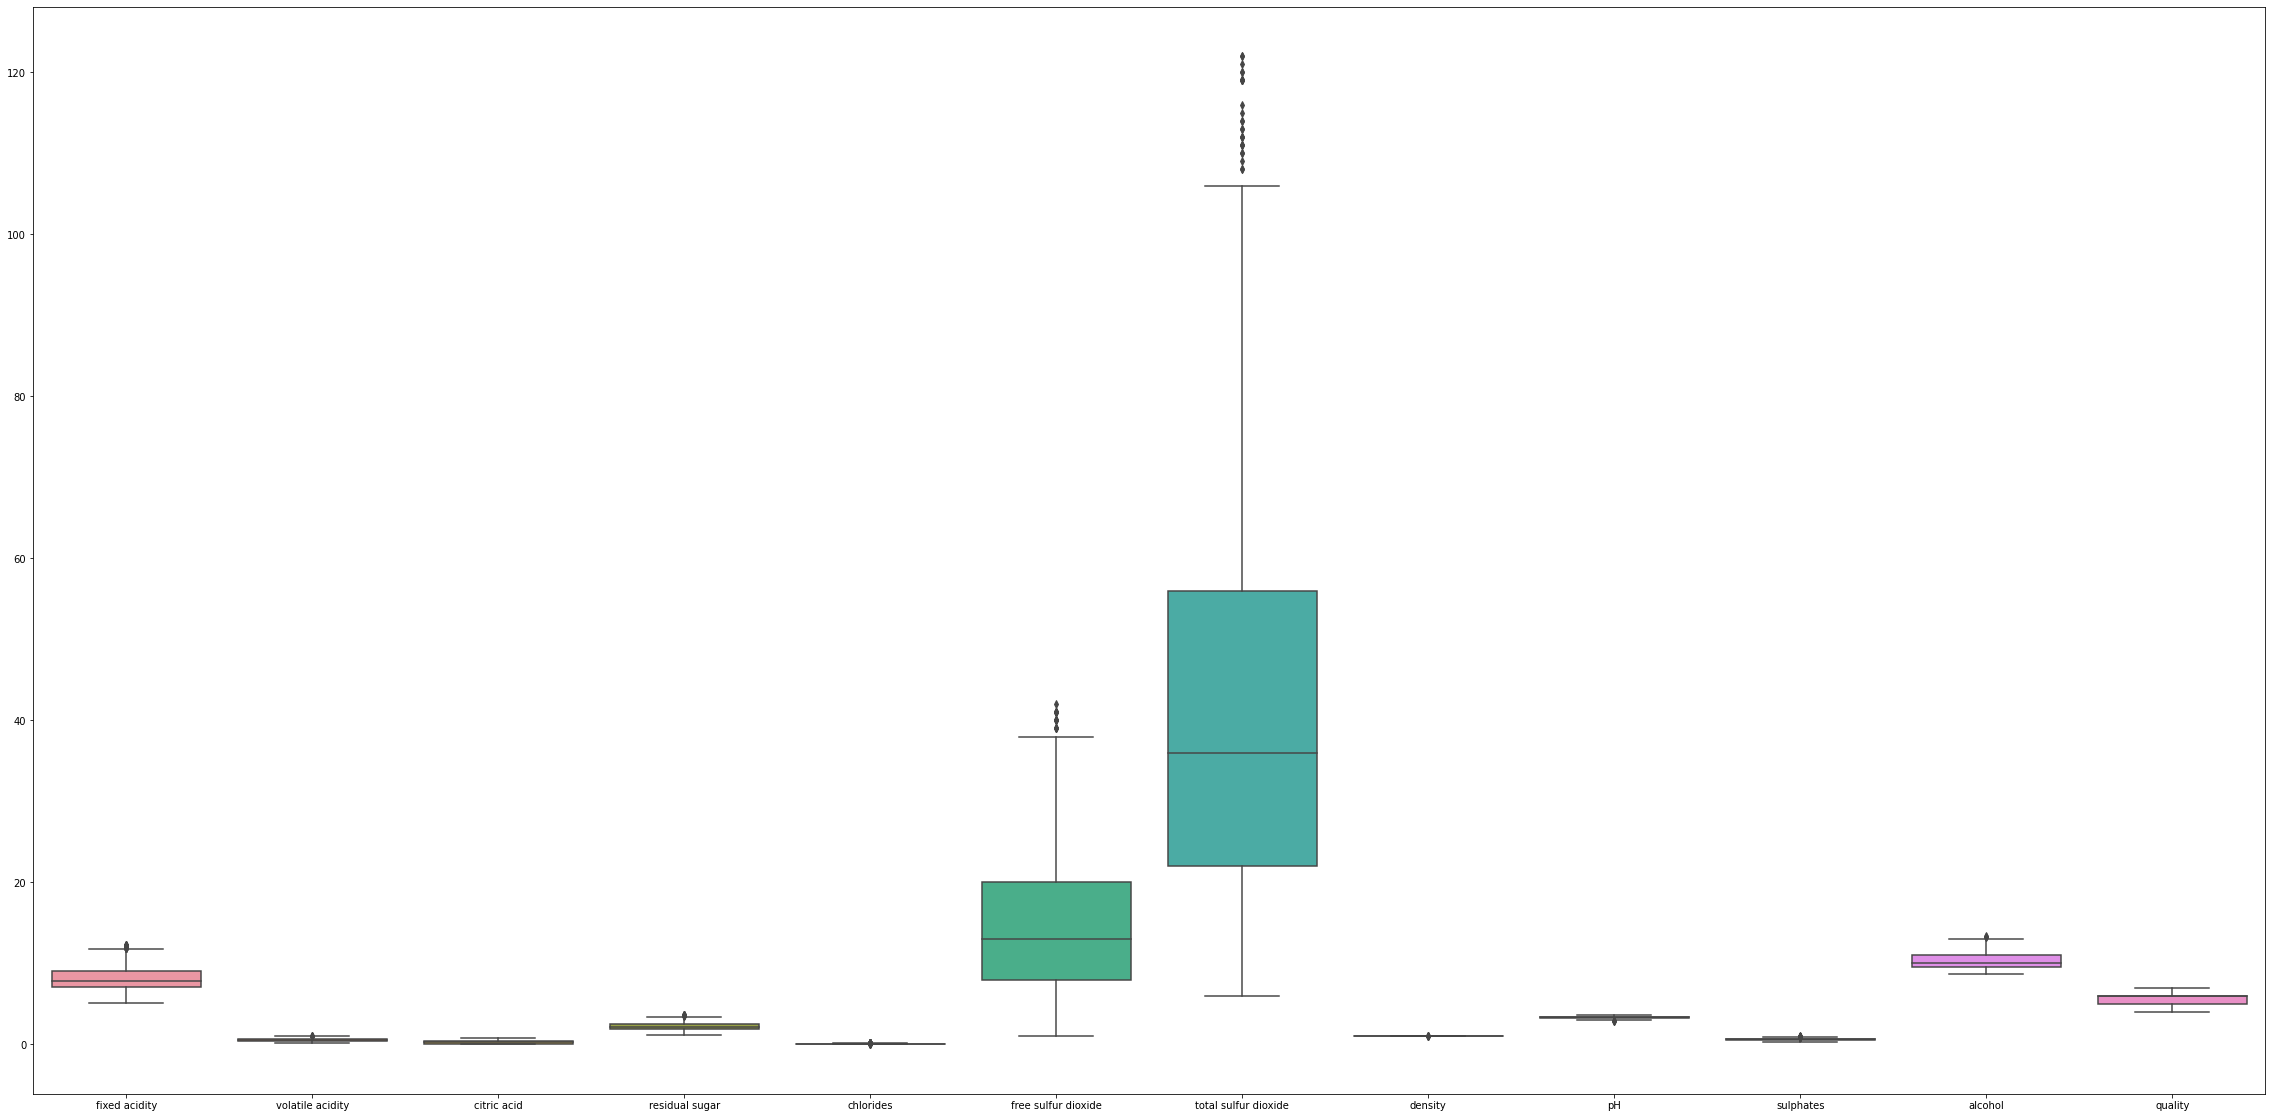

In [95]:
#Dataset after removing outliers
plt.figure(figsize=(40,20))
sns.boxplot(data=df)

<AxesSubplot:>

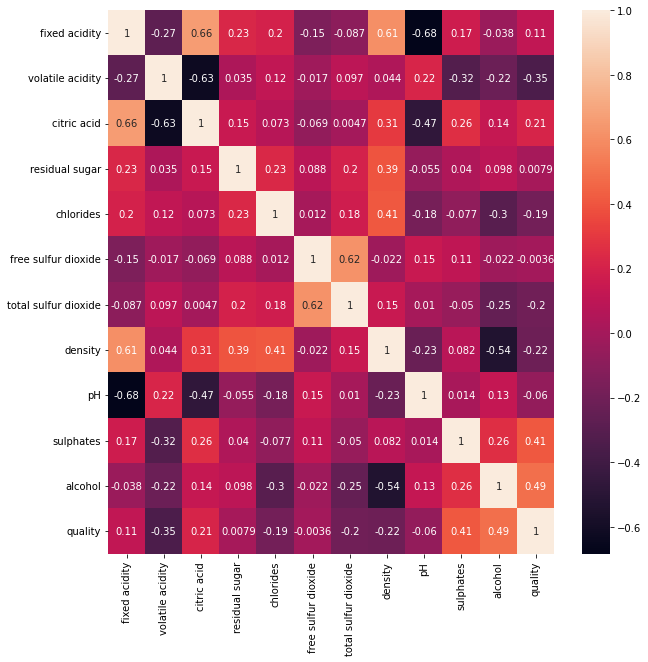

In [96]:
#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [97]:
#correlated features with quality
cor_feat = abs(df.corr()["quality"])

#relevant features
rel_feat = cor_feat[cor_feat>0.2]
rel_feat

volatile acidity        0.346962
citric acid             0.212133
total sulfur dioxide    0.203374
density                 0.215375
sulphates               0.413533
alcohol                 0.492551
quality                 1.000000
Name: quality, dtype: float64

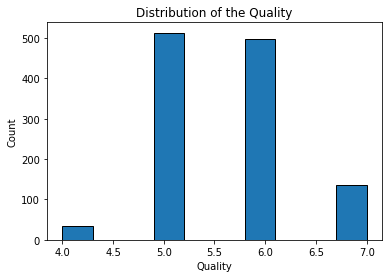

In [98]:
#Histogram of Quality Destribution
plt.hist(df.quality,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

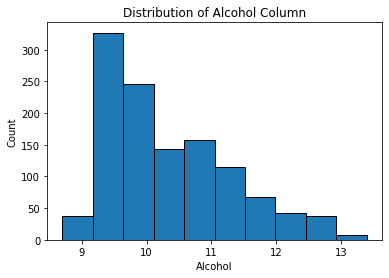

In [99]:
#Histogram of Alcohol Destribution
plt.hist(df.alcohol,histtype='bar',ec='black')
plt.title('Distribution of Alcohol Column')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

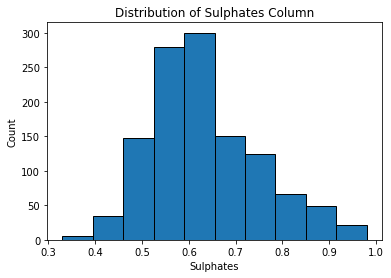

In [100]:
#Histogram of Sulphates Destribution
plt.hist(df.sulphates,histtype='bar',ec='black')
plt.title('Distribution of Sulphates Column')
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.show()

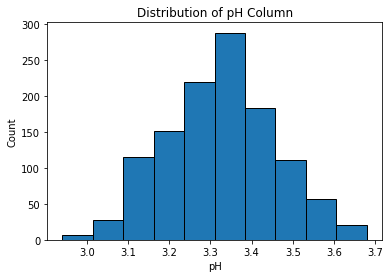

In [101]:
#Histogram of pH Destribution
plt.hist(df.pH,histtype='bar',ec='black')
plt.title('Distribution of pH Column')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

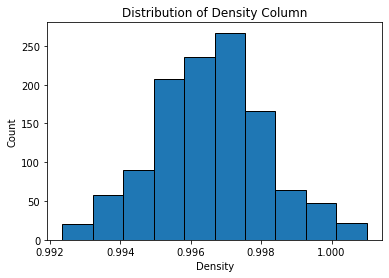

In [102]:
#Histogram of Density Destribution
plt.hist(df.density,histtype='bar',ec='black')
plt.title('Distribution of Density Column')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()

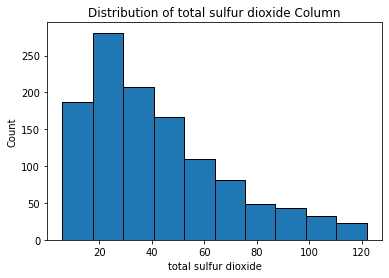

In [103]:
#Histogram of total sulfur dioxide Destribution
x = [df['total sulfur dioxide']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of total sulfur dioxide Column')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')
plt.show()

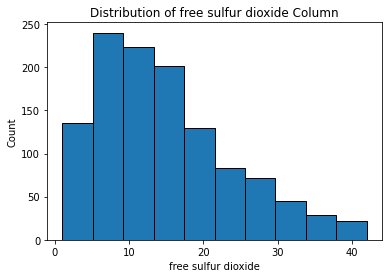

In [104]:
#Histogram of free sulfur dioxide Destribution
x = [df['free sulfur dioxide']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of free sulfur dioxide Column')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Count')
plt.show()

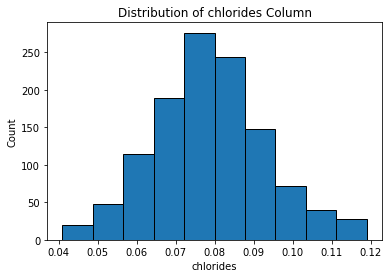

In [105]:
#Histogram of chlorides Destribution
plt.hist(df.chlorides,histtype='bar',ec='black')
plt.title('Distribution of chlorides Column')
plt.xlabel('chlorides')
plt.ylabel('Count')
plt.show()

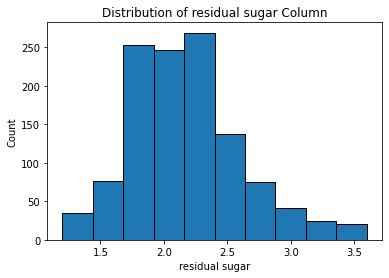

In [106]:
#Histogram of residual sugar Destribution
x = [df['residual sugar']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of residual sugar Column')
plt.xlabel('residual sugar')
plt.ylabel('Count')
plt.show()

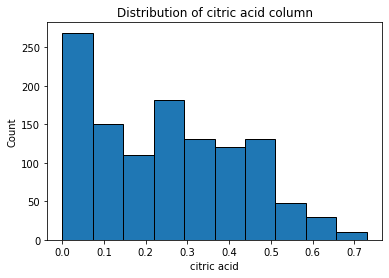

In [107]:
x = [df['citric acid']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of citric acid column')
plt.xlabel('citric acid')
plt.ylabel('Count')
plt.show()

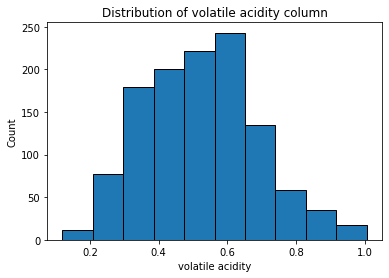

In [108]:
x = [df['volatile acidity']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of volatile acidity column')
plt.xlabel('volatile acidity')
plt.ylabel('Count')
plt.show()

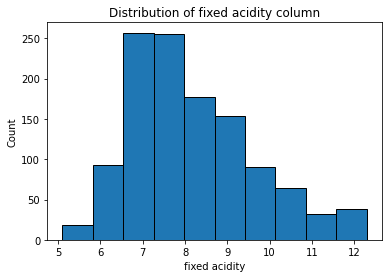

In [109]:
x = [df['fixed acidity']]
plt.hist(x, histtype='bar',ec='black')
plt.title('Distribution of fixed acidity column')
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.show()

According to the histogram plots above, we can notice that alcohol, total sulfur dioxide, free sulfur dioxide columns are skewed.

In [110]:
# split data into features and target
X = df.drop(["quality"], axis= "columns") # dropping the label variable (tip) from the data

y = df["quality"]

In [111]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=6)
# apply feature selection
X_selected = fs.fit_transform(X, y)

mask = fs.get_support()
new_features = X.columns[mask]
new_features


Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

Due to these analysis, we can see the that most features columns are volatile acidity, citric acid, total sulfur dioxide, density, sulphates and alcohol. We noticed this from the correlation heatmap; through the correlation of features with the target variable. We also noticed the same result with the feature_selection technique using "f_regression", we used this because this is a regression problem,  we'll be dropping the other columns so as to keep the important features only. 

In [112]:
#we drop the other features
df.drop(columns = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH'], inplace = True)

In [113]:
df.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


In [114]:
features_names = ["volatile acidity", "citric acid", "total sulfur dioxide", "density", "sulphates", "alcohol"]

In [115]:
# split data into features and target

X = df.drop(["quality"], axis= "columns") # dropping the label variable (tip) from the data

y = df["quality"]


In [116]:
#Scaling our Data with Standard Scaler
from sklearn.preprocessing import StandardScaler

scaled_x = StandardScaler().fit_transform(X)

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [120]:
from sklearn import metrics # For model evaluation

from sklearn.model_selection import train_test_split # To divide the data into training and test set

In [121]:
#splitting into 80-10-10 ratios
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [122]:
pd.DataFrame(X_train).to_csv("train_features.csv", index=False)
pd.DataFrame(X_val).to_csv("val_features.csv", index=False)
pd.DataFrame(X_test).to_csv("test_features.csv", index=False)

pd.DataFrame(y_train).to_csv("train_labels.csv", index=False)
pd.DataFrame(y_val).to_csv("val_labels.csv", index=False)
pd.DataFrame(y_test).to_csv("test_labels.csv", index=False)

## Hyperparameter tuning with GridSearchCV

We use GridSearch so as to get the best parameters for our model training

In [123]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [124]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }

cv_lr = GridSearchCV(lr, parameters, cv=5)
cv_lr.fit(tr_features, tr_labels.values.ravel())

print_results(cv_lr)

BEST PARAMS: {'C': 100}

0.59 (+/-0.038) for {'C': 0.001}
0.601 (+/-0.022) for {'C': 0.01}
0.614 (+/-0.019) for {'C': 0.1}
0.618 (+/-0.02) for {'C': 1}
0.618 (+/-0.02) for {'C': 10}
0.619 (+/-0.022) for {'C': 100}
0.619 (+/-0.022) for {'C': 1000}


In [126]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(tr_features, tr_labels.values.ravel())

print_results(cv_rf)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.272 (+/-0.108) for {'max_depth': 2, 'n_estimators': 5}
0.283 (+/-0.077) for {'max_depth': 2, 'n_estimators': 50}
0.279 (+/-0.086) for {'max_depth': 2, 'n_estimators': 100}
0.28 (+/-0.138) for {'max_depth': 10, 'n_estimators': 5}
0.393 (+/-0.105) for {'max_depth': 10, 'n_estimators': 50}
0.409 (+/-0.085) for {'max_depth': 10, 'n_estimators': 100}
0.281 (+/-0.18) for {'max_depth': 20, 'n_estimators': 5}
0.409 (+/-0.089) for {'max_depth': 20, 'n_estimators': 50}
0.414 (+/-0.099) for {'max_depth': 20, 'n_estimators': 100}
0.276 (+/-0.105) for {'max_depth': None, 'n_estimators': 5}
0.394 (+/-0.12) for {'max_depth': None, 'n_estimators': 50}
0.409 (+/-0.111) for {'max_depth': None, 'n_estimators': 100}


In [127]:
import joblib
joblib.dump(cv_rf.best_estimator_, '../../../RF_model.pkl')
joblib.dump(cv_lr.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [129]:
models = {}

for mdl in ['LR', 'RF']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [130]:
models

{'LR': LogisticRegression(C=100), 'RF': RandomForestRegressor(max_depth=20)}

In [131]:
from time import time

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    MSE = round(mean_squared_error(labels, pred), 3)
    MAE = round(mean_absolute_error(labels, pred), 3)
    r2Score = round(r2_score(labels, pred), 3)
    print('{} -- MSE: {} / MAE: {} / R2_Score: {} / RMSE: {} / Latency: {}ms'.format(name,
                                                                                   MSE,
                                                                                   MAE,
                                                                                   r2Score, 
                                                                                   np.sqrt(MSE),
                                                                                   round((end - start)*1000, 1)))

In [132]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- MSE: 0.441 / MAE: 0.39 / R2_Score: 0.091 / RMSE: 0.6640783086353597 / Latency: 3.0ms
RF -- MSE: 0.271 / MAE: 0.38 / R2_Score: 0.442 / RMSE: 0.5205766033928149 / Latency: 19.0ms


In [133]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)
evaluate_model('Logistic Regression', models['LR'], te_features, te_labels)

Random Forest -- MSE: 0.311 / MAE: 0.418 / R2_Score: 0.467 / RMSE: 0.5576737397439474 / Latency: 21.0ms
Logistic Regression -- MSE: 0.381 / MAE: 0.364 / R2_Score: 0.345 / RMSE: 0.6172519744804386 / Latency: 2.0ms


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

### Conclusion

*TODO*: We tested our hypertuned regression models, Logistic Regression and Random Forest models on  Test Data. This is the result below:

Test Data Results:

Random Forest -- MSE: 0.311 / MAE: 0.418 / R2_Score: 0.467 / RMSE: 0.5576737397439474 / Latency: 21.0ms

Logistic Regression -- MSE: 0.381 / MAE: 0.364 / R2_Score: 0.345 / RMSE: 0.6172519744804386 / Latency: 2.0ms

We observe that we have lower Mean Square Error in Random Forest, compared to Logistic Regression. While Logistic Regression had lower MAE compared to Random Forest. Random Forest also had a better R2_score and Root Mean Square Error Score. Although Random Forest takes more time to be executed.

In [134]:
lr_model = LogisticRegression(C=100)
lr_model.fit(tr_features, tr_labels.values.ravel())

LogisticRegression(C=100)

                feature  importance
0      volatile acidity    0.796063
1           citric acid    0.315251
3               density    0.038926
2  total sulfur dioxide   -0.105883
5               alcohol   -0.548156
4             sulphates   -0.780289


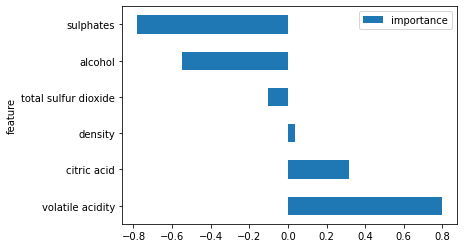

In [136]:
#checking the feature importance for top features in logistic regression
feature_importance = pd.DataFrame(features_names, columns = ["feature"])
feature_importance["importance"] = lr_model.coef_[0]
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()


We check the feature importance in our logisticRegression model, we can see that volatile acidity, sulphates, alcohol and citric acid hold the most importance in the model prediction. Alcohol and Sulphates holds the highest importance

                       feature
alcohol               0.329098
sulphates             0.182413
total sulfur dioxide  0.143548
volatile acidity      0.135807
density               0.108715
citric acid           0.100418


<AxesSubplot:>

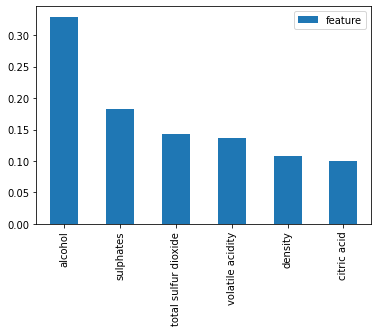

In [137]:
#checking the feature importance for top features in random forest
rf = RandomForestRegressor(max_depth=20, n_estimators=100)
 
model = rf.fit(tr_features, tr_labels.values.ravel())
feat_importances = pd.DataFrame(model.feature_importances_, features_names, columns=["feature"])
feat_importances.sort_values(by=['feature'], ascending=False, inplace=True)

print(feat_importances)
feat_importances.plot(kind='bar')

For the RandomForest, our important features are the Alcohol, Sulphates, Volatile Acidity, total sulfur acid. Alcohol holds the highest importance for Random Forest